<a href="https://colab.research.google.com/github/tomkart/stable-diffusion-colab/blob/main/RealVisXL_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install torch torchvision transformers diffusers accelerate invisible-watermark


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.0 MB/s eta 0:00:00


In [14]:
import torch
from diffusers import StableDiffusionXLPipeline
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
# Load the RealVisXL model
model_path = "SG161222/RealVisXL_V5.0"  # Or another suitable model

pipe = StableDiffusionXLPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

# Enable attention slicing if you have low VRAM (optional)
pipe.enable_model_cpu_offload()


A mixture of fp16 and non-fp16 filenames will be loaded.
Loaded fp16 filenames:
[vae/diffusion_pytorch_model.fp16.safetensors, text_encoder/model.fp16.safetensors, unet/diffusion_pytorch_model.fp16.safetensors, text_encoder_2/model.fp16.safetensors]
Loaded non-fp16 filenames:
[unet/diffusion_pytorch_model-00001-of-00002.safetensors, unet/diffusion_pytorch_model-00002-of-00002.safetensors
If this behavior is not expected, please check your folder structure.


Fetching 21 files:   0%|          | 0/21 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [16]:
def generate_image(prompt, negative_prompt=None, num_inference_steps=50, guidance_scale=7.5):
    """
    Generate an image with SDXL/RealVisXL requirements.
    """
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
    ).images[0]
    return image

  0%|          | 0/50 [00:00<?, ?it/s]

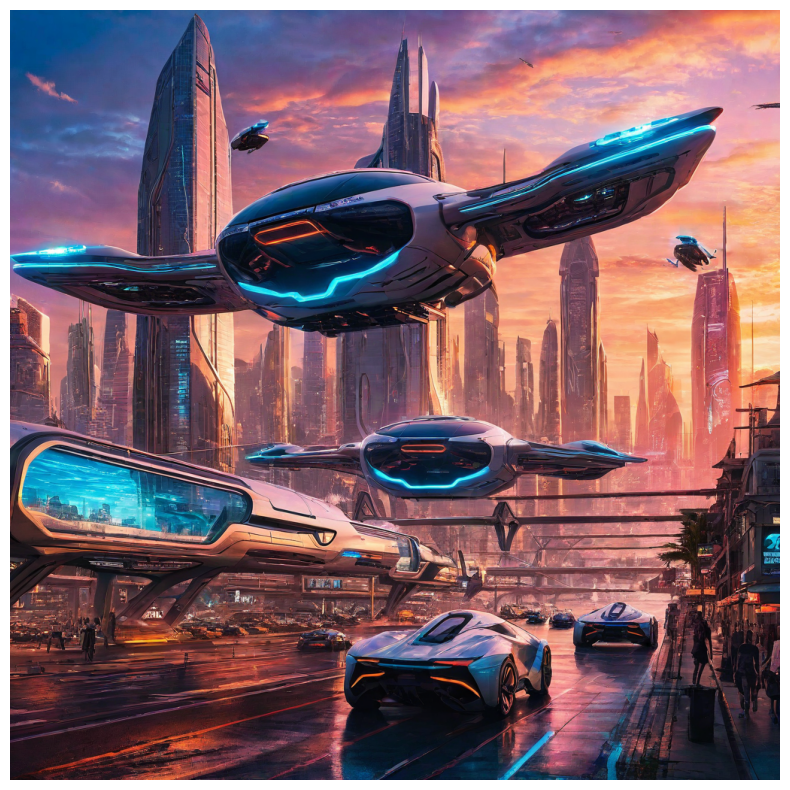

In [17]:
# Define your text prompt
prompt = "A futuristic cityscape at sunset with flying cars and neon lights"
negative_prompt = "blurry, low quality, cartoon, 3d render"  # Optional

image = generate_image(prompt, negative_prompt)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()